# About this workbook

This workbook is focused on training on images which are classified as having fire or not having fire. It uses Python language and most important libraries to work with like NumPy, Tensorflow, etc. This workbook also uses a pre-trained model Resnet-50 (A depp-CNN network with 50 layers).

# Motive behind this workbook

The resultant model can be used to identify if certain image has fire in them, This can be greatly useful for some of the applications, For example this model can be used in security cameras which can take photos in a given interval of time and can process the image and if model shows that the image contains fire, application connected to the model can quickly connect to emergency contacts and call for help.

# Libraries used # 

**OS** - The OS module in Python provides functions for interacting with the operating system. OS comes under Python’s standard utility modules. This module provides a portable way of using operating system-dependent functionality. The *os* and *os.path* modules include many functions to interact with the file system.

**Tensorflow** - TensorFlow is an end-to-end open-source platform for machine learning. It has an ecosystem of tools, libraries and community resources that helps developers easily build and deploy ML-powered applications.

**Numpy** - NumPy is the fundamental package for scientific computing in Python. It is a Python library that provides a multidimensional array object, various derived objects (such as masked arrays and matrices), and an assortment of routines for fast operations on arrays, including mathematical, logical, shape manipulation, sorting, selecting, I/O, discrete Fourier transforms, basic linear algebra, basic statistical operations, random simulation and much more.


**MatplotLib** - Matplotlib is an visualization library in Python for 2D plots of arrays. Matplotlib is a multi-platform data visualization library built on NumPy arrays and designed to work with the broader SciPy stack.


In [1]:
# import required libraries

import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dropout,BatchNormalization,Dense,GlobalAveragePooling2D

# About the data

Currently this notebook is being runned on Kaggle. Kaggle is an online community platform for data scientists and machine learning enthusiasts. Kaggle allows users to collaborate with other users, find and publish datasets, use GPU integrated notebooks, and compete with other data scientists to solve data science challenges. So the data I am using here is a part of Kaggle's open-source community.

In [2]:
# reading data that is required to be trained on
train_data = '/kaggle/input/test-dataset/Fire-Detection'
print(os.listdir(train_data))

['0', '1']


In [3]:
# above we can see that fire dataset is marked as 0(No-fire) and 1(Fire) so seperating data into 2 types
train_fire = os.listdir(os.path.join(train_data,'1'))
train_not_fire = os.listdir(os.path.join(train_data,'0'))

# Viewing the images 

First we will view sample images, so that we get a brief idea how they look and decide how to proceed pre-process them before sending them for training

In [4]:
# Setting index to 0 so that every time this cell is runned it will take 8 pictures from each class and print them on screen.
fig_index=0

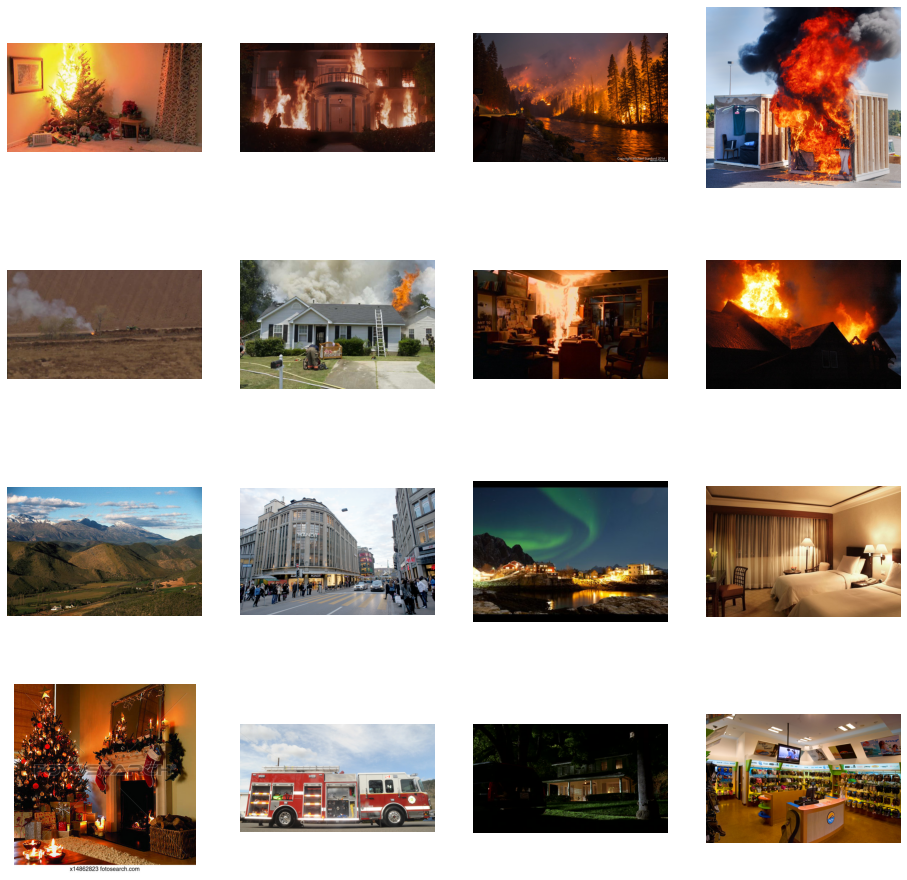

In [5]:
# Setting number of columns and number of rows to view sample images
n_rows = 4
n_cols = 4
# Here we are using gcf to clen the plot if the cell is being runned 2 or more times
fig = plt.gcf()

# Setting the size of each image
fig.set_size_inches(n_rows*4,n_cols*4)

fig_index+=8

# Pulling 8 images from each class to display
fire_8 = [os.path.join(train_data,'1',fname) for fname in train_fire[fig_index-8:fig_index]]
not_fire_8 = [os.path.join(train_data,'0',fname) for fname in train_not_fire[fig_index-8:fig_index]]

# Printing the images from each class, if you notice you will see first 8 images will have fire in them other 8 will not have fire in them
for i,img_path in enumerate(fire_8+not_fire_8):
    sp = plt.subplot(n_rows,n_cols,i+1)
    sp.axis('Off')
    img = mimg.imread(img_path)
    plt.imshow(img)
plt.show()

# Image pre-processing

In this step we are pre-processing the image which needs to go for training, the pre-processing set can consist of cropping the image, mirroring the image, rotating the image etc.

Here we will be using tensorflow's ImageDataGenerator class, This class comes in handy when you want to pre-process the image and convert the resultant into tensor for model to train on. 

In [6]:
# Using tensorflow's ImageDataGenerator to prepare the image-data for training
train_gen = ImageDataGenerator(width_shift_range = 0.5,
                              height_shift_range = 0.5,
                              validation_split = 0.2)

train_set = train_gen.flow_from_directory(train_data,target_size = (300,300),class_mode = 'binary',subset = 'training',batch_size = 8)

validation_set = train_gen.flow_from_directory(train_data,target_size = (300,300),class_mode = 'binary',subset = 'validation',batch_size = 8)

Found 521 images belonging to 2 classes.
Found 130 images belonging to 2 classes.


# Building the Model

Here we will be building our model with the help of Resnet-50, Resnet-50 is a pretrained model which has been trained on millions of images and can directly used based on our needs.

Below you can see I am not including top as we will build our own dense network from the Resnet-50's output, and I am also not frezzing the last 10 layers as it will help to classify our image better.

In [7]:
# Using pre-trained Resnet-50 layers model to train on our fire-dataset
# here we are setting include_top as False, as we will add our own dense layers after resnet 50 last layer
pre_trained_resnet_50 = tf.keras.applications.ResNet50(include_top = False,
                                                      input_shape = (300,300,3),
                                                      pooling = 'avg',
                                                      classes = 100,
                                                      weights = 'imagenet')

# Here we want last 10 layers to be trainable so freezing first 40 layers
x = 0
for layer in pre_trained_resnet_50.layers:
    layer.trainable = False
    x+=1
    if x == 39:
        break

2023-01-29 06:41:25.932177: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-29 06:41:25.933098: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-29 06:41:26.124923: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-29 06:41:26.125893: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-29 06:41:26.126666: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

94781440/94765736 [==============================] - 0s 0us/step


# Building top layer to our Resnet-50

After we are completed with configuring Resnet-50, its time to build top layer where our data are further processed before our model gives final output, In below cell you can see I have used different classes from tensorflow library to bulid the top layer, here are the classes I used with explaination-

**Sequential** - The "tf.keras.Sequential" class is a way to create a linear stack of layers in TensorFlow. It is a convenient class for creating models where the output of one layer is the input to the next layer, and so on. The layers can be added to the Sequential object one at a time, using the add() method. Once all the layers have been added, the model can be compiled and trained just like any other model in TensorFlow.

**Dense** - The "tf.keras.layers.Dense" class is a fully connected layer in TensorFlow. This means that every neuron in the layer is connected to every neuron in the previous and next layers. The Dense layer takes several arguments, including the number of neurons in the layer (also known as the "units"), the activation function to use, and the input shape. The number of units determines the number of neurons that the layer will have, the activation function is used to introduce non-linearity into the model and is applied element-wise to the output of the layer.

**Dropout** - The "tf.keras.layers.Dropout" class is a regularization technique in TensorFlow used to prevent overfitting of the model. It works by randomly "dropping out" or setting to zero a certain percentage of neurons during training. This forces the remaining neurons to learn more robust features, reducing the chances of overfitting.


In [8]:
# Adding extra Dense layers after Resnet 50 last layer, we do this to increase our models capability to categorise image as having fire or not having fire
model = Sequential()
model.add(pre_trained_resnet_50)
model.add(Dense(2048,activation='relu'))
model.add(Dense(4096,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(8000,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4000,activation='relu'))
model.add(Dense(2000,activation='relu'))
model.add(Dense(1000,activation='relu'))
model.add(Dense(500,activation='relu'))
model.add(Dense(250,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(1,activation = 'sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
dense (Dense)                (None, 2048)              4196352   
_________________________________________________________________
dense_1 (Dense)              (None, 4096)              8392704   
_________________________________________________________________
dropout (Dropout)            (None, 4096)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 8000)              32776000  
_________________________________________________________________
dropout_1 (Dropout)          (None, 8000)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 4000)              3

# Using callbacks and optmizers

Now after creating our model, we need to be ensure that our model will learn better and yield better result during validation and prediction, this is where callbacks and optmizer come into play

**Optimizers** - Optimizers are used to train the model because they help to update the model's parameters in a way that minimizes the loss function. During training, the model's parameters are updated iteratively based on the input data and the corresponding labels. The goal is to find a set of parameters that minimize the difference between the model's predictions and the true labels.

**Callbacks** - Callbacks are used to customize the behavior of the training process in TensorFlow. They allow you to perform certain actions during the training process, such as saving the model after each epoch, stopping the training early if the loss stops improving, or reducing the learning rate when the loss plateaus.

In [9]:
# Using tensorflow's learning-rate-scheduler to change learning rate at each epoch, this will help us to find the best learning rate for our model 
callback_lr = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-8 * 10**(epoch/20))

# Using tensorflow's Model-Checkpoint to save best model having less validation loss
modelcheck_lr = tf.keras.callbacks.ModelCheckpoint(filepath='/kaggle/working/final_model.h5',monitor='val_loss',save_best_only = True)

# Using Adam's optimizer to optimize our model to better learn on our dataset
model.compile(optimizer = tf.keras.optimizers.Adam() ,loss = 'binary_crossentropy',metrics = 'accuracy')

In [10]:
# Now time to train our model on fire dataset
model_hist = model.fit(train_set,validation_data = validation_set,epochs = 100,callbacks = [callback_lr,modelcheck_lr])

2023-01-29 06:41:33.677094: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100


2023-01-29 06:41:40.632661: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


66/66 [==============================] - 54s 538ms/step - loss: 0.6722 - accuracy: 0.7946 - val_loss: 0.6773 - val_accuracy: 0.8231


/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/100
66/66 [==============================] - 26s 388ms/step - loss: 0.6705 - accuracy: 0.8119 - val_loss: 0.6786 - val_accuracy: 0.8308
Epoch 3/100
66/66 [==============================] - 25s 385ms/step - loss: 0.6694 - accuracy: 0.8061 - val_loss: 0.6780 - val_accuracy: 0.8231
Epoch 4/100
66/66 [==============================] - 25s 376ms/step - loss: 0.6669 - accuracy: 0.8234 - val_loss: 0.6754 - val_accuracy: 0.8308
Epoch 5/100
66/66 [==============================] - 25s 383ms/step - loss: 0.6670 - accuracy: 0.8234 - val_loss: 0.6736 - val_accuracy: 0.8308
Epoch 6/100
66/66 [==============================] - 26s 388ms/step - loss: 0.6661 - accuracy: 0.8273 - val_loss: 0.6731 - val_accuracy: 0.8308
Epoch 7/100
66/66 [==============================] - 26s 390ms/step - loss: 0.6638 - accuracy: 0.8196 - val_loss: 0.6702 - val_accuracy: 0.8308
Epoch 8/100
66/66 [==============================] - 26s 389ms/step - loss: 0.6633 - accuracy: 0.8273 - val_loss: 0.6674 - val_accuracy:

# Viewing the result of training

We are viewing the performance of model based on 2 parameters - 

**Validation loss** - Validation loss is a measure of how well a machine learning model generalizes to unseen data, and it is used to evaluate the model's performance during the training process, and to help prevent overfitting. Comparing the validation loss and training loss can be used to detect overfitting and make appropriate adjustments to the model.

**Accuracy** - In supervised machine learning, accuracy is used to evaluate the model's ability to correctly predict the output labels for a given set of input data. It is calculated by comparing the model's predictions to the true labels and counting the number of instances where the predictions match the true labels.

Now after we complete training our model over 100 epochs, you can see the result below in form of graph or from above (val_loss per epoch), we can conclude at epoch 66 our validation loss is lowest around 0.0477, so at that point our learning rate was around 1.995e-05, we have also saved the best model with lower validation loss.

(1e-08, 0.001, 0.0, 1.0)

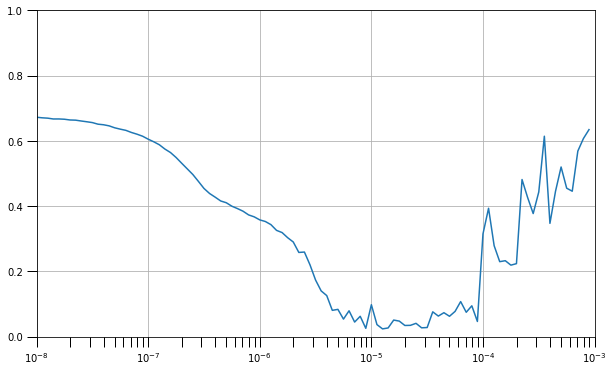

In [11]:
# Creating graph to visualzie how our model performed at different learning rate and its loss.
lrs = 1e-8 * (10 ** (np.arange(100) / 20))

# Set the figure size
plt.figure(figsize=(10, 6))

# Set the grid
plt.grid(True)

# Plot the loss in log scale
plt.semilogx(lrs, model_hist.history["loss"])

# Increase the tickmarks size
plt.tick_params('both', length=10, width=1, which='both')

# Set the plot boundaries
plt.axis([1e-8, 1e-3, 0, 1])

# Time to check our model performance

In [12]:
# Downloading our best model that was picked up by Model-Checkpoint
best_model = tf.keras.models.load_model('/kaggle/working/final_model.h5')

# now checking the final evalutaion of our model
best_model.evaluate(validation_set)

17/17 [==============================] - 5s 248ms/step - loss: 0.0757 - accuracy: 0.9769


[0.07568952441215515, 0.9769230484962463]

As we can see above our model has a validation loss of 0.075 and overall accuracy of 97.6%

# Applying our model to real-world images

Now after we have trained our model now we will se how our model performs in some of the sample images

In [13]:
# Funtion to read image and transform image to tensor 
def load_and_prep_image(filename, img_shape = 300):
    img = tf.io.read_file(filename) #read image
    img = tf.image.decode_image(img) # decode the image to a tensor
    img = tf.image.resize(img, size = [img_shape, img_shape]) # resize the image
    return img

In [14]:
# Funtion to read image and give desired output with image
def pred_and_plot(model, filename, class_names):
    """
    Imports an image located at filename, makes a prediction on it with
    a trained model and plots the image with the predicted class as the title.
    """
    # Import the target image and preprocess it
    img = load_and_prep_image(filename)
    
    # Make a prediction
    pred = model.predict(tf.expand_dims(img, axis=0))
    
    if len(pred[0]) > 1: # check for multi-class
        pred_class = class_names[pred.argmax()] # if more than one output, take the max
    else:
        pred_class = class_names[int(tf.round(pred)[0][0])] # if only one output, round

    # Plot the image and predicted class
    sh_image = plt.imread(filename)
    plt.imshow(sh_image)
    plt.title(f"Prediction: {pred_class}")
    plt.axis(False)  

# Sample 1

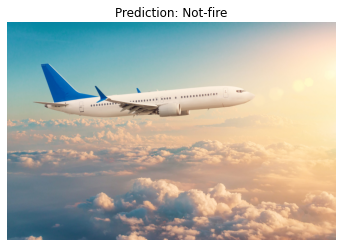

In [15]:
# specifying path to sample image from list of test images.
sample_img = '/kaggle/input/fireornot-firetestset/test/AdobeStock_249454423-scaled.jpeg'

# predefining class names so not to confuse with the output
class_names = ['Not-fire','Fire']

# reading the input and checking the output
pred_and_plot(best_model,sample_img,class_names)

# Sample 2

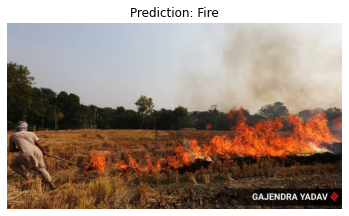

In [16]:
# specifying path to sample image from list of test images.
sample_img = '/kaggle/input/fireornot-firetestset/test/Stubble-burning-1-1-1.jpg'

# predefining class names so not to confuse with the output
class_names = ['Not-fire','Fire']

# reading the input and checking the output
pred_and_plot(best_model,sample_img,class_names)